**Лекция 7**

# Сингулярное разложение матриц #

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Преобразования-$\mathbf{A^\top-A}$-и-$\mathbf{A-A^\top}$" data-toc-modified-id="Преобразования-$\mathbf{A^\top-A}$-и-$\mathbf{A-A^\top}$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Преобразования $\mathbf{A^\top A}$ и $\mathbf{A A^\top}$</a></span></li><li><span><a href="#Сингулярные-базисы,-сингулярное-разложение" data-toc-modified-id="Сингулярные-базисы,-сингулярное-разложение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сингулярные базисы, сингулярное разложение</a></span></li><li><span><a href="#Геометрический-смысл" data-toc-modified-id="Геометрический-смысл-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Геометрический смысл</a></span><ul class="toc-item"><li><span><a href="#Спектральное-разложение" data-toc-modified-id="Спектральное-разложение-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Спектральное разложение</a></span></li><li><span><a href="#Сингулярное-разложение" data-toc-modified-id="Сингулярное-разложение-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сингулярное разложение</a></span></li></ul></li><li><span><a href="#Малоранговые-аппроксимации-матриц" data-toc-modified-id="Малоранговые-аппроксимации-матриц-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Малоранговые аппроксимации матриц</a></span></li><li><span><a href="#Метод-главных-компонент" data-toc-modified-id="Метод-главных-компонент-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Метод главных компонент</a></span><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Связь-с-сингулярным-разложением" data-toc-modified-id="Связь-с-сингулярным-разложением-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Связь с сингулярным разложением</a></span></li><li><span><a href="#Эффективная-размерность" data-toc-modified-id="Эффективная-размерность-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Эффективная размерность</a></span></li></ul></li><li><span><a href="#Примеры" data-toc-modified-id="Примеры-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Примеры</a></span><ul class="toc-item"><li><span><a href="#Data-mining:-таблица-оценок-фильмов" data-toc-modified-id="Data-mining:-таблица-оценок-фильмов-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data mining: таблица оценок фильмов</a></span></li><li><span><a href="#Dimension-reduction:-аппроксимации-изображений" data-toc-modified-id="Dimension-reduction:-аппроксимации-изображений-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Dimension reduction: аппроксимации изображений</a></span></li></ul></li><li><span><a href="#Источники" data-toc-modified-id="Источники-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import sys
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

---

## Постановка задачи ##

В прошлый раз мы увидели: некоторые квадратные матрицы могут быть представлены в виде $A = S \Lambda S^\top$.
Наилучшие представители квадратных матриц &mdash; симметричные матрицы &mdash; представимы в виде $A = Q \Lambda Q^\top$ ($Q$ &mdash; ортогональная матрица). \
Но как быть, если матрица недиагонализируема? И как быть, если матрица даже не квадратная?

Рассмотрим матрицу $A$ размерностью $m \times n$. \
Соответствующий ей линейный оператор переводит вектор $\mathbf{x}$ из $\mathbb{R}^n$ в $\mathbb{R}^m$.
Поэтому теперь нам потребуется два ортонормированных базиса &laquo;собственных&raquo; (на самом деле *сингулярных*) векторов $\mathbf{v}_1, \ldots, \mathbf{v}_n$ из $\mathbb{R}^n$ и $\mathbf{u}_1, \ldots, \mathbf{u}_m$ из $\mathbb{R}^m$.
И мы будем искать решение уравнения $A\mathbf{v} = \sigma \mathbf{u}$.

Или в матричном виде

$$ A V = U \Sigma $$
и
$$ A = U \Sigma V^\top. $$

---

## Преобразования $\mathbf{A^\top A}$ и $\mathbf{A A^\top}$ ##

Рассмотрим преобразования $A^\top A$ и $A A^\top$.
Сначала повторим то, что уже знаем о них:

1. Ядро преобразования $A^\top A$ совпадает с ядром отображения $A$, а образ $A^\top A$ &mdash; с образом отображения $A^\top$.
1. Ранги матриц $A$, $A^\top$, $A^\top A$ и $A^\top A$ равны.
1. Матрицы $A^\top A$ и $A A^\top$ симметричные и неотрицательно определённые (все собственные значения $\lambda_i \ge 0$).

**Предложение.** Если $\mathbf{x}$ &mdash; собственный вектор преобразования $A^\top A$, принадлежащий собственному значения $\lambda \ne 0$, то $A(\mathbf{x})$ &mdash; собственный вектор преобразования $A A^\top$, принадлежащий тому же собственному значению. При этом линейно независимым собственным векторам $\mathbf{x}_1, \ldots, \mathbf{x}_s$ преобразования $A^\top A$ соответствуют линейно независимые собственные векторы $A(\mathbf{x}_1), \ldots, A(\mathbf{x}_s)$ преобразования $A A^\top$. \
**Доказательство.** Пусть $A^\top A (\mathbf{x}) = \lambda \mathbf{x}$. Подействует отображением $A$ на обе части этого равенства: $(A A^\top) A(\mathbf{x}) = \lambda A(\mathbf{x})$. Вектор $A(\mathbf{x})$ собственный для $A A\top$ и принадлежит значению $\lambda$. \
Вторую часть утверждения докажем от противного.
предположим, что векторы $A(\mathbf{x}_1), \ldots, A(\mathbf{x}_s)$ линейно зависимы и $\alpha_1 A(\mathbf{x}_1), \ldots, \alpha_s A(\mathbf{x}_s)$ &mdash; их нетривиальная линейная комбинация, равная нулю.
Подействовав на неё отображением $A^\top$, получим

$$
  \alpha_1 A^\top A(\mathbf{x}_1) + \ldots + \alpha_s A^\top A(\mathbf{x}_s) = \alpha_1 \lambda_1 \mathbf{x}_1 + \ldots + \alpha_s  \lambda_s \mathbf{x}_s = 0,
$$

что противоречит линейной независимости векторов $\mathbf{x}_1, \ldots, \mathbf{x}_s$.
Предложение доказано.

**Следствие.** Ненулевые собственные значения преобразований $A^\top A$ и $A A^\top$ совпадают, причём равные собственные значения имеют одинаковые кратности.

**Замечание.** В доказательстве нигде не использовался тот факт, что вторая матрица в произведении является транспонированной первой.
Поэтому предложение о совпадении собственных значений справедливо и в общем случае &mdash; для матриц $AB$ и $BA$.

---

## Сингулярные базисы, сингулярное разложение ##

Итак, матрицы $A^\top A$ и $A A^\top$ можно представить в виде

$$ A^\top A = V \Lambda_1 V^\top  \tag{1}\label{AtA_decomp} $$
и 
$$ A A^\top = U \Lambda_2 U^\top. \tag{2}\label{AAt_decomp} $$

Причём матрицы $\Lambda_1$ и $\Lambda_2$ отличаются только размером: ненулевые диагональные элементы матриц совпадают.

**Определение.** *Первым сингулярным базисом* отображения $A$ называется ортонормированный базис в $\mathbb{R}^n$, состоящий из собственных векторов $\mathbf{v}_i$ преобразования $A^\top A$, если векторы базиса упорядочены так, что соответствующие собственные значения не возрастают: $\lambda_1 \ge \ldots \ge \lambda_n$.

**Определение.** Числа $\sigma_i = \sqrt{\lambda_i}$ называются *сингулярными числами* отображения $A$.

**Определение.** *Вторым сингулярным базисом* отображения $A$ называется ортонормированный базис в $\mathbb{R}^m$, состоящий из собственных векторов $\mathbf{u}_i$ преобразования $A A^\top$. Его первые $r$ векторов имеют вид $\mathbf{u}_i = \sigma_i^{-1} A(\mathbf{v}_i)$.

**Теорема.** Произвольная матрица $A$ размера $m \times n$ и ранга $r$ может быть представлена в виде

$$ A = U \Sigma V^\top, \tag{3}\label{SVD} $$

где $U$ &mdash; ортогональная матрица размера $m \times m$, $V^\top$ &mdash; ортогональная матрица размера $n \times n$, а $\Sigma$ &mdash; матрица, на главной диагонали у которой расположены $r$ положительных чисел $\sigma_1, \ldots, \sigma_r$, а остальные элементы нулевые.
Такое разложение называется *сингулярным разложением* (singular value decomposition, SVD).


В самом деле, подставляя выражение $\eqref{SVD}$ в разложения $\eqref{AtA_decomp}$ и $\eqref{AAt_decomp}$, получим

$$ A^\top A = V \Sigma^\top U^\top \cdot U \Sigma V^\top = V \Sigma^\top \Sigma V^\top $$
и 
$$ A A^\top = U \Sigma V^\top \cdot V \Sigma^\top U^\top = U \Sigma \Sigma^\top U^\top. $$

Мы видим, что столбцами матрицы $V$ являются векторы первого сингулярного базиса, столбцами матрицы $U$ &mdash; второго, а на главной диагонали матрицы $\Sigma$ стоят сингулярные числа $\sigma_i = \sqrt{\lambda_i}$.

**Примечание.** Часто под сингулярным разложением понимают его упрощённую форму, в которую входят только сингулярные векторы, соответствующие ненулевым сингулярным числам.
В этом случае матрица $U$ будет иметь размер $m \times r$, $\Sigma$ &mdash; $r \times r$, а $V$ &mdash; $n \times r$.

**Свойства сингулярного разложения:**

1. Ненулевые сингулярные числа отображений $A$ и $A^\top$ совпадают.
1. Если оторадение $A$ обратимо и $\sigma_i$ &mdash; его сингулярные числа, то $\sigma_i^{-1}$ &mdash; сингулярные числа $A^{-1}$. Первый и второй сингулярные базисы $A$ отличаются от соответственно второго и первого сингулярных базисов $A^\top$ не больше чем порядком векторов. 
1. С помощью SVD можно получить явную формулу для псевдообратной матрицы:
$$ A^{+} = V \Sigma^{+} U^\top = \sum_{i=1}^r \frac{1}{\sigma_i} \mathbf{v}_i \mathbf{u}_i^\top $$.

---

## Геометрический смысл ##

Посмотрим, что представляет собой сингулярное разложение с точки зрения геометрии.

На этот раз возьмём квадрат и сравним его преобразования в случае разложения по собственным и сингулярным числам.

В качестве преобразования возьмём матрицу $C$:
$$
  C = 
  \begin{pmatrix}
    3 & 2 \\
    0 & 2
  \end{pmatrix}.
$$

In [3]:
C = np.array([[3, 2],
              [0, 2]])

origin = [[0,0], [0,0]] # origin point
Sq = np.array([[-1,1], [1,1], [1,-1], [-1,-1], [-1,1]]).T

### Спектральное разложение ###

In [4]:
lmbd, U = LA.eig(C)
CU = C @ U
print('lambda = ', np.round(lmbd, 4))
print('U = ')
np.disp(np.round(U, 4))

lambda =  [3. 2.]
U = 
[[ 1.     -0.8944]
 [ 0.      0.4472]]


In [5]:
Sq1 = LA.inv(U) @ Sq
Sq2 = np.diag(lmbd) @ Sq1
Sq3 = U @ Sq2
Sqn = [Sq, Sq1, Sq2, Sq3]
Sqn_str = ["$\mathbf{Sq}$", "$\mathbf{U^{-1}Sq}$",
         " $\mathbf{\Lambda U^{-1}Sq}$", "$\mathbf{U\Lambda U^{-1}Sq}$"]

U1 = LA.inv(U) @ U
U2 = np.diag(lmbd) @ U1
U3 = U @ U2
Un = [U, U1, U2, U3]

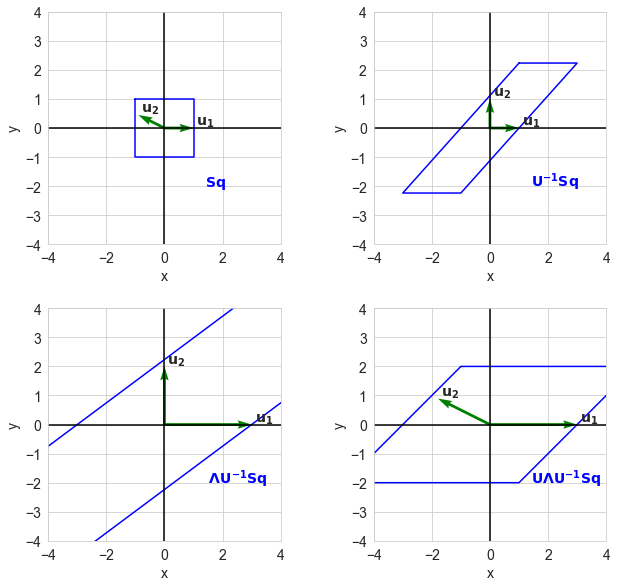

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4)

for i, axi in enumerate(ax.flatten()):
    axi.plot(Sqn[i][0,:], Sqn[i][1,:], color='b')
    axi.quiver(*origin, Un[i][0,:], Un[i][1,:], color=['g'],
               width=0.012, angles='xy', scale_units='xy', scale=1)
    axi.set_xlabel('x', fontsize=14)
    axi.set_ylabel('y', fontsize=14)
    axi.set_xlim([-4, 4])
    axi.set_ylim([-4, 4])
    axi.set_aspect('equal')
    axi.grid(True)
    # axi.set_title("Original vectors")
    axi.axhline(y=0, color='k')
    axi.axvline(x=0, color='k')
    axi.text(*(Un[i].T[0]+[.1,.1]), "$\mathbf{u_1}$", fontsize=14)
    axi.text(*(Un[i].T[1]+[.1,.1]), "$\mathbf{u_2}$", fontsize=14)
    axi.text(1.4, -2, Sqn_str[i], color='b', fontsize=14)

### Сингулярное разложение ###

In [7]:
U, sgm, Vt = LA.svd(C)

print('sigma = ')
np.disp(sgm)
print('U = ')
np.disp(U)
print('Vt = ')
np.disp(Vt)

sigma = 
[3.81061639 1.57454841]
U = 
[[ 0.9347217  -0.35538056]
 [ 0.35538056  0.9347217 ]]
Vt = 
[[ 0.73588229  0.67710949]
 [-0.67710949  0.73588229]]


In [8]:
Sq1 = Vt @ Sq
Sq2 = np.diag(sgm) @ Sq1
Sq3 = U @ Sq2
Sqn = [Sq, Sq1, Sq2, Sq3]
Sqn_str = ["$\mathbf{Sq}$", "$\mathbf{V^TSq}$",
          "$\mathbf{\Sigma V^T Sq}$", "$\mathbf{U \Sigma V^T Sq}$"]

V = Vt.T
V1 = Vt @ V
V2 = np.diag(sgm) @ V1
V3 = U @ V2
Vn = [V, V1, V2, V3]

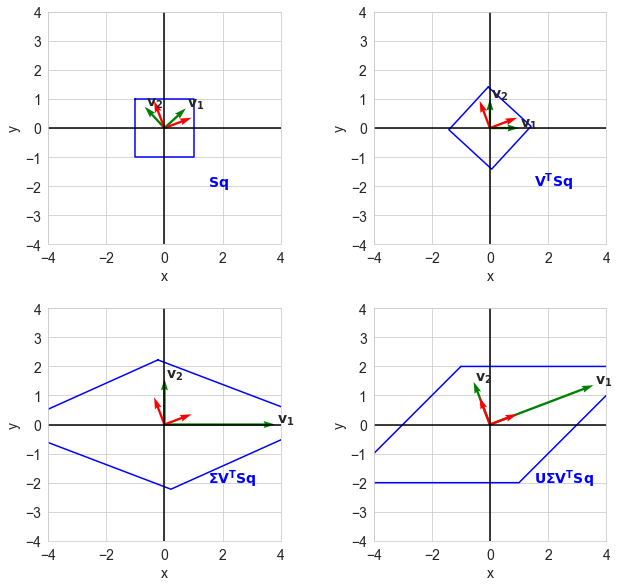

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4)

for i, axi in enumerate(ax.flatten()):
    axi.plot(Sqn[i][0,:], Sqn[i][1,:], color='b')
    axi.quiver(*origin, Vn[i][0,:], Vn[i][1,:], color=['g'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.quiver(*origin, U[0,:], U[1,:], color=['r'],
               width=0.01, angles='xy', scale_units='xy', scale=1)
    axi.set_xlabel('x', fontsize=14)
    axi.set_ylabel('y', fontsize=14)
    axi.set_xlim([-4, 4])
    axi.set_ylim([-4, 4])
    axi.set_aspect('equal')
    axi.grid(True)
    # axi.set_title("Original vectors")
    axi.axhline(y=0, color='k')
    axi.axvline(x=0, color='k')
    axi.text(*(Vn[i].T[0]+[.05,.05]), "$\mathbf{v_1}$", fontsize=14)
    axi.text(*(Vn[i].T[1]+[.05,.05]), "$\mathbf{v_2}$", fontsize=14)
    axi.text(1.5, -2, Sqn_str[i], color='b', fontsize=14)

---

## Малоранговые аппроксимации матриц ##

В некоторых практических задачах требуется приближать заданную матрицу $A$ некоторой другой матрицей $A_k$ с заранее заданным рангом $k$.

Возникает вопрос, в каком смысле приближать?
Ответ: в смысле нормы.


**Определение.** Нормой матрицы $A$ называется вещественное число $\|A\|$, удовлетворяющее следующим условиям:

1. $\|A\| \ge 0$, причём $\|A\| = 0$ только при $A = 0$;
1. для $\alpha \in \mathbb{R}$ $\|\alpha A\| = |\alpha| \|A\|$;
1. $\|A + B\| \le \|A\| + \|B\|$;
1. $\|A B\| \le \|A\| \cdot \|B\|$.

**Примеры:**

1. Спектральная (евклидова) норма
$\|A\|_2 = \max \frac{A \mathbf{x}}{\mathbf{x}} = \sigma_1$;

1. Норма Фробениуса
$\|A\|_F = \sqrt{\sigma_1^2 + \ldots + \sigma_r^2}$;

1. Ядерная норма
$\|A\|_N = \sigma_1 + \ldots + \sigma_r$.


**Теорема (Эккарта &mdash; Янга).** Наилучшая (в смысле нормы Фробениуса) матрица ранга $k$, соответствующая матрице $A$ является матрица $A_k = U \Sigma_k V^\top$.

**Примечание.** В 1955 году Мирский доказал, что подходит любая норма матрицы, если зависит только от сингулярных чисел.

Итак, для любой нормы из приведённых выше,

$$ \|A - B\| \ge \|A - A_k\|. $$

---

## Метод главных компонент ##

В методе главных компонент (principal component analysis, PCA) строится минимальное число новых признаков, по которым исходные признаки восстанавливаются линейным преобразованием с минимальными погрешностями.
PCA относится к методам обучения без учителя.

### Постановка задачи ###

Пусть дана матрица признаков $F_{m \times n}$.

Обозначим через $G_{m \times k}$ признаков тех же объектов в новом пространстве меньшей размерности $k < n$.

Потребуем, чтобы исходные признаки можно было восстановить по новым с помощью некоторого линейного преобразования, определяемого матрицей $V$:
$$ \hat{F} = G U. $$

Восстановленное описание $\hat{F}$ не обязано в точности совпадать с исходным описанием $F$, но их отличие на объектах обучающей выборки должно быть как можно меньше при выбранной размерности $m$:
$$ \Delta^2(G, V) = \|G V^\top - F\|^2 \rightarrow \min_{G, V}. $$

**Теорема.** Минимум $\Delta^2(G, V)$ достигается, когда столбцы матрицы $V$ есть собственные векторы $F^\top F$, соответствующие $k$ максимальным собственным значениям.

**Определение.** Собственные векторы $\mathbf{v}_1, \ldots, \mathbf{v}_m$, отвечающие максимальным собственным значениям, называются *главными компонентами*.

### Связь с сингулярным разложением ###

Если $k = n$, то $\Delta^2(G, V) = 0$.
В этом случае представление $F = G V^\top$ является точным и совпадает с сингулярным разложением: $F = G V^\top = V D V^\top$.

Если $k < n$, то представление $F \approx G V^\top$ является приближённым.
Сингулярное разложение матрицы $G V^\top$ получается из сингулярного разложения матрицы $F$ путём отбрасывания (обнуления) $n − k$ минимальных собственных значений.

### Эффективная размерность ###

Главные компоненты содержат основную информацию о матрице $F$.
Число главных компонент $k$ называют также эффективной размерностью задачи.
На практике её определяют следующим образом.
Все сингулярные числа матрицы $F$ упорядочиваются по убыванию: $\sigma_1 > \ldots > \sigma_n > 0$.

Задаётся пороговое значение $\varepsilon \in [0, 1]$, достаточно близкое к нулю, и определяется
наименьшее целое $k$, при котором относительная погрешность приближения матрицы $F$ не превышает $\varepsilon$:

$$
  E(k) = \frac{\|G V^\top − F\|^2}{\|F\|^2} = \frac{\sigma_{k+1} + \ldots + \sigma_n}{\sigma_1 + \ldots + \sigma_n} \le \varepsilon.
$$

---

## Примеры ##

### Data mining: таблица оценок фильмов ###

Фильмы (столбцы):

1. Бриллиантовая рука
1. Фантомас
1. В джазе только девушки
1. Сталкер
1. Психо

Таблица оценок фильмов $F$:
$$
  F = 
  \begin{pmatrix}
    5 & 5 & 4 & 1 & 1 \\
    4 & 5 & 5 & 1 & 2 \\
    4 & 4 & 5 & 2 & 1 \\
    1 & 1 & 1 & 5 & 5 \\
    2 & 1 & 2 & 5 & 4 \\
    5 & 4 & 5 & 2 & 1 \\
    4 & 4 & 4 & 1 & 2 \\
    5 & 1 & 1 & 1 & 1 \\
  \end{pmatrix}.
$$

In [18]:
F = np.array([
    [ 5, 5, 4, 1, 1 ],  #  Любит комедии
    [ 4, 5, 5, 1, 2 ],  #  Любит комедии
    [ 4, 4, 5, 2, 1 ],  #  Любит комедии
    [ 1, 1, 1, 5, 5 ],  #  Любит остросюжетные
    [ 2, 1, 2, 5, 4 ],  #  Любит остросюжетные
    [ 5, 4, 5, 2, 1 ],  #  Любит комедии
    [ 4, 4, 4, 1, 2 ],  #  Любит комедии
    [ 5, 1, 1, 1, 1. ],  #  Фанат Бриллиантовой руки
])

In [36]:
# SVD 
U, s, Vt = LA.svd(F, full_matrices=False)
Sigma = np.zeros((F.shape[0], F.shape[1]))
Sigma[:min(F.shape[0], F.shape[1]), :min(F.shape[0], F.shape[1])] = np.diag(s)

print('s =', np.round(s, 2))
print('U = ')
np.disp(np.round(U, 2))
print('Vt = ')
np.disp(np.round(Vt, 2))

s = [19.41  8.04  3.4   1.8   0.79]
U = 
[[-0.41 -0.24  0.06 -0.28 -0.81]
 [-0.42 -0.16 -0.33 -0.35  0.34]
 [-0.4  -0.12 -0.18  0.5  -0.01]
 [-0.23  0.72 -0.08 -0.29 -0.15]
 [-0.27  0.59  0.04  0.29  0.04]
 [-0.43 -0.15  0.05  0.49  0.05]
 [-0.37 -0.1  -0.08 -0.37  0.42]
 [-0.23 -0.03  0.91 -0.11  0.19]]
Vt = 
[[-0.56 -0.5  -0.53 -0.29 -0.27]
 [-0.21 -0.27 -0.2   0.68  0.61]
 [ 0.8  -0.4  -0.44  0.02 -0.07]
 [-0.02 -0.41  0.45  0.5  -0.61]
 [ 0.05 -0.59  0.52 -0.44  0.42]]


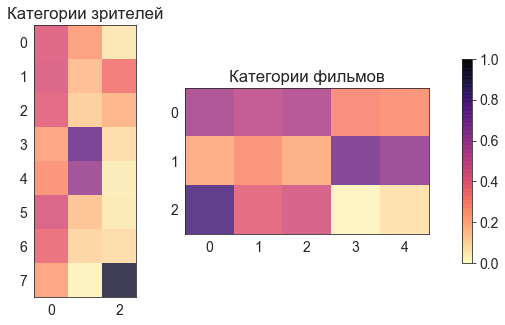

In [42]:
seaborn.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(12,5))
im1 = axes[0].imshow(abs(U[:,:3]), vmin=0,vmax=1, cmap='magma_r', alpha=0.8)
axes[0].set_title("Категории зрителей");
im2 = axes[1].imshow(abs(Vt[:3,:]),vmin=0,vmax=1, cmap='magma_r', alpha=0.8)
axes[1].set_title("Категории фильмов")

fig.colorbar(im1, ax=axes.ravel().tolist(), shrink=0.75)

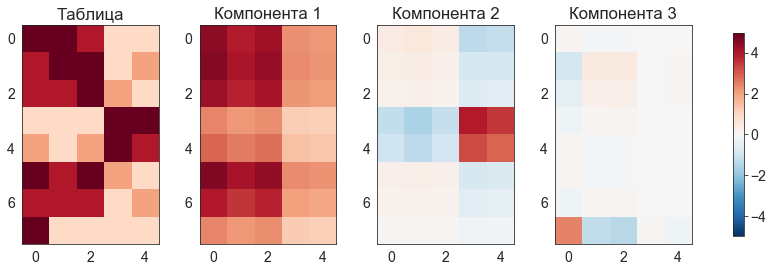

In [46]:
seaborn.set_style("white")
fig, axes = plt.subplots(1, 4, figsize=(15,5))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

k = 3
vlims = [-5, 5]

im = axes[0].imshow(F, vmin=vlims[0],vmax=vlims[1], cmap='RdBu_r')
axes[0].set_title("Таблица")

for i in range(0, k):
    Fi = s[i] * U[:,i].reshape(-1,1) @ Vt[i,:].reshape(1,-1)
#     np.disp(np.round(Fi, 2))
    axes[i+1].imshow(Fi, vmin=vlims[0],vmax=vlims[1], cmap='RdBu_r')
    axes[i+1].set_title(f"Компонента {i+1}")

fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.75)
plt.show()

In [ ]:
Sigma = np.zeros((F.shape[0], F.shape[1]))
Sigma[:min(F.shape[0], F.shape[1]), :min(F.shape[0], F.shape[1])] = np.diag(s)

# Reconstruction of the matrix using the first k singular values
k = 3
Fk = s[k-1] * U[:, (k-1):k] @ Vt[(k-1):k, :]
Fs = U[:, :k] @ Sigma[:k, :k] @ Vt[:k, :]

# print('Fk = ')
# np.disp(np.round(Fk, 1))

print('Fs = ')
np.disp(np.round(Fs, 1))

### Dimension reduction: аппроксимации изображений ###

Посмотрим на главные компоненты картин или фотографий.

In [ ]:
# Reading the image
# img = plt.imread("img\Einstein.png")
# img = plt.imread("img\Banksy.png")
img = plt.imread("img\Mona Lisa.png")
# img = plt.imread("img\Van Gogh.png")
print(np.shape(img))

In [ ]:
seaborn.set_style("white")
fig, axes = plt.subplots(1, 1, figsize=(5,10))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes.imshow(img, cmap='gray')
axes.set_title("Original image")

plt.show()

In [ ]:
# SVD 
U, s, VT = LA.svd(img)
print(np.shape(s))

S_s = sum(s)
eds = list(map(lambda i: sum(s[i:]) / S_s, range(len(s))))

In [ ]:
seaborn.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(s)
ax1.set_title('singular values')
ax1.set_yscale('log')
ax1.set_xlim(-5, 100)
ax1.set_ylim(10e-1, 1e2)

ax2.plot(eds)
ax2.set_title('effective dimension')
ax2.set_xlim(-5, 100)
ax2.set_ylim(0.25, 1.0)

plt.show()

In [ ]:
# Sigma = np.zeros((img.shape[0], img.shape[1]))
# Sigma[:min(img.shape[0], img.shape[1]), :min(img.shape[0], img.shape[1])] = np.diag(s)

# # Reconstruction of the matrix using the first k singular values
# k = 5
# img_k = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

In [ ]:
seaborn.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.plot(U[:, :1])
ax1.set_title("U")

ax2.plot(VT[:1, :].T)
ax2.set_title("VT")

plt.show()

In [ ]:
seaborn.set_style("white")
fig, axes = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("original image")
for i in range(5):
    img_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[(i+1) // 3, (i+1) % 3].imshow(img_i, cmap='gray')
    axes[(i+1) // 3, (i+1) % 3].set_title(
        f"$\sigma_{i+1} \mathbf{{u}}_{i+1} \mathbf{{v}}_{i+1}^\\top$")
    
plt.show()

In [ ]:
seaborn.set_style("white")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(img, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(img_k, cmap='gray')
ax2.set_title(f"{k} principal components")
plt.show()

---

## Источники ##

1. *Воронцов К.В.* [Математические методы обучения по прецедентам (теория обучения машин)](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf). &mdash; 141 c.
1. *Strang G.* Linear algebra and learning from data. &mdash; Wellesley-Cambridge Press, 2019. &mdash; 432 p.
1. [Материалы](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d) автора [Reza Bagheri](https://medium.com/@reza.bagheri79).

In [ ]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))
# print('scipy: {}'.format(sp.__version__))